## Testing how runtime scales with number of phases in the composite

In [1]:
# Import necessary packages
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

# Custom imports
from hashin_shtrikman_mp.core.user_input import MaterialProperty, Material, MixtureProperty, Mixture, UserInput
from hashin_shtrikman_mp.core.optimizer import Optimizer
from hashin_shtrikman_mp.core.visualizer import Visualizer

In [2]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("test_consolidated_dict") as f:
    consolidated_dict = json.load(f)

In [3]:
# Define the number of trials
num_trials = 10

## 2 phase composite

In [4]:
# Example material matches for an n=2 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids}

In [5]:
# Need user input to create an HS instance
# Use same bounds for all materials
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=400, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=3, lower_bound=0.5),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}}


In [6]:
# Create an HS instance for testing
optimizer_2phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:10:28,781 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:10:28,789 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:10:28,791 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mixture': {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}

In [7]:
# Perform Optimizaztion several times to observe variation
runtimes_2phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_2phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_2phase_optimization.append(runtime)

Trial 0: 4.9958930015563965 seconds
Trial 1: 3.745821952819824 seconds
Trial 2: 4.4815449714660645 seconds
Trial 3: 4.7965099811553955 seconds
Trial 4: 3.761415958404541 seconds
Trial 5: 5.211104869842529 seconds
Trial 6: 3.8231189250946045 seconds
Trial 7: 4.691671848297119 seconds
Trial 8: 4.255712032318115 seconds
Trial 9: 3.830228805541992 seconds


## 3 phase composite

In [11]:
# Example material matches for an n=3 phase compositie
mat_3_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

In [12]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_3 = Material(name='mat_3', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [13]:
# Create an HS instance for testing
optimizer_3phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:20:46,995 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:20:47,004 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:20:47,005 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [14]:
# Perform Optimizaztion several times to observe variation
runtimes_3phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_3phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_3phase_optimization.append(runtime)

Trial 0: 4.72166895866394 seconds
Trial 1: 4.2575507164001465 seconds
Trial 2: 4.870743751525879 seconds
Trial 3: 4.652393817901611 seconds
Trial 4: 4.703929901123047 seconds
Trial 5: 4.737858057022095 seconds
Trial 6: 5.050867080688477 seconds
Trial 7: 4.549363136291504 seconds
Trial 8: 4.887413024902344 seconds
Trial 9: 4.692601680755615 seconds


## 4 phase composite

In [15]:
# Example material matches for an n=3 phase compositie
mat_4_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids}

In [16]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_4 = Material(name='mat_4', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [17]:
# Create an HS instance for testing
optimizer_4phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:22:05,311 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:22:05,318 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:22:05,319 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [18]:
# Perform Optimizaztion several times to observe variation
runtimes_4phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_4phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_4phase_optimization.append(runtime)

Trial 0: 6.993996858596802 seconds
Trial 1: 5.0093560218811035 seconds
Trial 2: 4.4465250968933105 seconds
Trial 3: 5.377499103546143 seconds
Trial 4: 5.401111841201782 seconds
Trial 5: 4.6852641105651855 seconds
Trial 6: 5.724739074707031 seconds
Trial 7: 4.344121932983398 seconds
Trial 8: 5.827008008956909 seconds
Trial 9: 4.687118053436279 seconds


## 5 phase composite

In [19]:
# Example material matches for an n=3 phase compositie
mat_5_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids, 'mat5': mat_5_ids}

In [20]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_5 = Material(name='mat_5', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [21]:
# Create an HS instance for testing
optimizer_5phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:23:10,857 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:23:10,864 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:23:10,865 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [22]:
# Perform Optimizaztion several times to observe variation
runtimes_5phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_5phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_5phase_optimization.append(runtime)

Trial 0: 6.667259931564331 seconds
Trial 1: 5.431067705154419 seconds
Trial 2: 5.613159894943237 seconds
Trial 3: 5.828797101974487 seconds
Trial 4: 5.618411064147949 seconds
Trial 5: 5.564501047134399 seconds
Trial 6: 5.7481689453125 seconds
Trial 7: 5.446811199188232 seconds
Trial 8: 5.555796146392822 seconds
Trial 9: 5.646515846252441 seconds


## 6 phase composite

In [23]:
# Example material matches for an n=3 phase compositie
mat_6_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids}

In [24]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_6 = Material(name='mat_6', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [25]:
# Create an HS instance for testing
optimizer_6phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:24:33,709 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:24:33,715 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:24:33,716 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [26]:
# Perform Optimizaztion several times to observe variation
runtimes_6phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_6phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_6phase_optimization.append(runtime)

Trial 0: 5.646515846252441 seconds
Trial 1: 5.646515846252441 seconds
Trial 2: 5.646515846252441 seconds
Trial 3: 5.646515846252441 seconds
Trial 4: 5.646515846252441 seconds
Trial 5: 5.646515846252441 seconds
Trial 6: 5.646515846252441 seconds
Trial 7: 5.646515846252441 seconds
Trial 8: 5.646515846252441 seconds
Trial 9: 5.646515846252441 seconds


## 7 phase composite

In [27]:
# Example material matches for an n=3 phase compositie
mat_7_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids}

In [28]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_7 = Material(name='mat_7', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [29]:
# Create an HS instance for testing
optimizer_7phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:26:02,734 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:26:02,742 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:26:02,742 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [30]:
# Perform Optimizaztion several times to observe variation
runtimes_7phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_7phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_7phase_optimization.append(runtime)

Trial 0: 6.7847819328308105 seconds
Trial 1: 7.493862152099609 seconds
Trial 2: 6.741783142089844 seconds
Trial 3: 6.571820974349976 seconds
Trial 4: 6.5677149295806885 seconds
Trial 5: 6.401928424835205 seconds
Trial 6: 6.495960712432861 seconds
Trial 7: 6.362908840179443 seconds
Trial 8: 6.522957801818848 seconds
Trial 9: 6.463013172149658 seconds


## 8 phase composite

In [31]:
# Example material matches for an n=3 phase compositie
mat_8_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids}

In [32]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_8 = Material(name='mat_8', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [33]:
# Create an HS instance for testing
optimizer_8phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:27:15,612 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:27:15,628 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:27:15,632 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [34]:
# Perform Optimizaztion several times to observe variation
runtimes_8phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_8phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_8phase_optimization.append(runtime)

Trial 0: 7.956164836883545 seconds
Trial 1: 6.8592541217803955 seconds
Trial 2: 6.847315073013306 seconds
Trial 3: 7.084316968917847 seconds
Trial 4: 6.966584920883179 seconds
Trial 5: 6.854282855987549 seconds
Trial 6: 6.947903871536255 seconds
Trial 7: 7.024404048919678 seconds
Trial 8: 7.016859769821167 seconds
Trial 9: 6.89792013168335 seconds


## 9 phase composite

In [35]:
# Example material matches for an n=3 phase compositie
mat_9_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids}

In [36]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_9 = Material(name='mat_9', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [37]:
# Create an HS instance for testing
optimizer_9phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:28:34,069 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:28:34,076 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:28:34,077 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [38]:
# Perform Optimizaztion several times to observe variation
runtimes_9phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_9phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime= end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_9phase_optimization.append(runtime)

Trial 0: 7.531111240386963 seconds
Trial 1: 8.38609504699707 seconds
Trial 2: 7.587351083755493 seconds
Trial 3: 7.4179298877716064 seconds
Trial 4: 7.68280291557312 seconds
Trial 5: 7.500305891036987 seconds
Trial 6: 7.675968885421753 seconds
Trial 7: 7.403609991073608 seconds
Trial 8: 7.685263156890869 seconds
Trial 9: 7.419527769088745 seconds


## 10 phase composite

In [39]:
# Example material matches for an n=3 phase compositie
mat_10_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids,
                'mat10': mat_10_ids}

In [40]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_10 = Material(name='mat_10', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10, mixture]

# Initialize UserInput instance with materials and mixtures
user_input= UserInput(materials=[mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10], mixtures=[mixture])
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universa

In [41]:
# Create an HS instance for testing
optimizer_10phase = Optimizer(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-12-03 23:30:12,671 - hashin_shtrikman_mp.log.custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/hashin_shtrikman_mp/core/../io/inputs/mp_property_docs.yaml.
2024-12-03 23:30:12,679 - hashin_shtrikman_mp.log.custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-12-03 23:30:12,680 - hashin_shtrikman_mp.log.custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


self.nuild_dict: <bound method UserInput.build_dict of {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 400.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 3.0, 'lower_bound': 0.5}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_boun

In [42]:
# Perform Optimizaztion several times to observe variation
runtimes_10phase_optimization = []
for i in range(num_trials):
    start = time.time()
    optimizer_10phase.set_HS_optim_params(gen_counter=False)
    end = time.time()
    runtime = end - start
    print(f'Trial {i}: {runtime} seconds')
    runtimes_10phase_optimization.append(runtime)

Trial 0: 8.887562990188599 seconds
Trial 1: 8.03679895401001 seconds
Trial 2: 8.12556004524231 seconds
Trial 3: 7.958115100860596 seconds
Trial 4: 8.055333137512207 seconds
Trial 5: 8.304200172424316 seconds
Trial 6: 7.793166875839233 seconds
Trial 7: 8.301149129867554 seconds
Trial 8: 7.9410340785980225 seconds
Trial 9: 8.103191137313843 seconds


## Compare runtimes

In [43]:
runtimes = np.array([runtimes_2phase_optimization, 
                     runtimes_3phase_optimization, 
                     runtimes_4phase_optimization, 
                     runtimes_5phase_optimization, 
                     runtimes_6phase_optimization, 
                     runtimes_7phase_optimization, 
                     runtimes_8phase_optimization, 
                     runtimes_9phase_optimization,
                     runtimes_10phase_optimization])
phases = np.arange(len(runtimes)) + 2

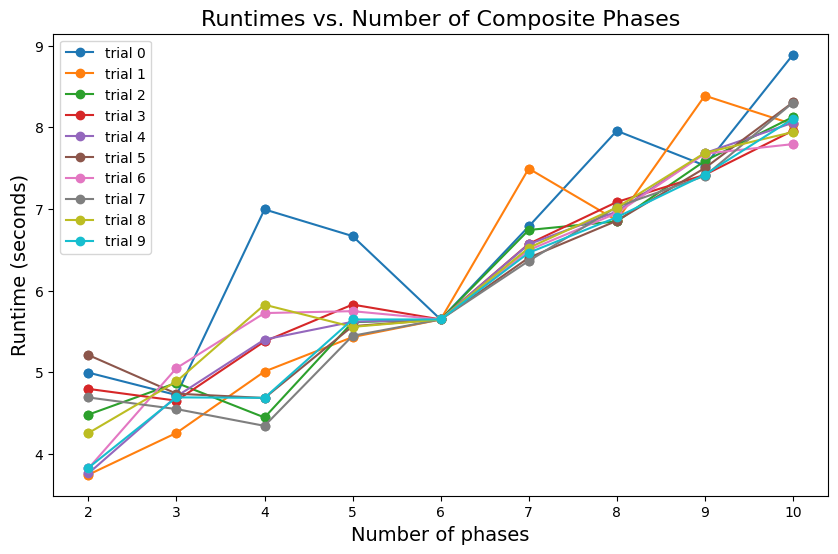

In [44]:
# Plot
plt.figure(figsize=(10, 6))

for i in range(num_trials):

    plt.plot(phases, runtimes[:, i], marker='o', linestyle='-', label=f'trial {i}')
    plt.scatter(phases, runtimes[:, i])

plt.xlabel('Number of phases', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Runtimes vs. Number of Composite Phases', fontsize=16)
plt.legend()

plt.show()

In [45]:
# Statistics
min_runtime = np.min(runtimes)
max_runtime = np.max(runtimes)
avg_runtime = np.mean(runtimes)
med_runtime = np.median(runtimes)

print(f'Min runtime: {min_runtime}')
print(f'Max runtime: {max_runtime}')
print(f'Average runtime: {avg_runtime}')
print(f'Median runtime: {med_runtime}')

Min runtime: 3.745821952819824
Max runtime: 8.887562990188599
Average runtime: 6.127306845453051
Median runtime: 5.736454010009766
